# Convolutional Neural Network Architecture

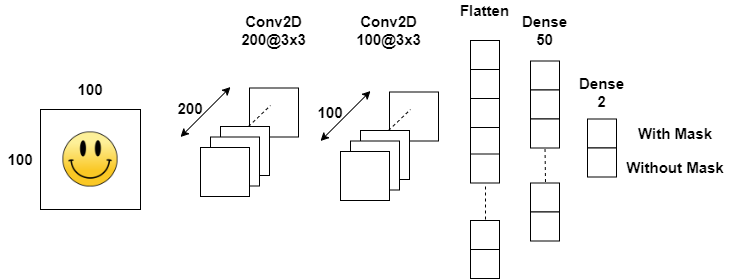

In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Using TensorFlow backend.


In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [4]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Train on 976 samples, validate on 244 samples
Epoch 1/20
976/976 [==============================] - 51s 53ms/step - loss: 0.7842 - accuracy: 0.5430 - val_loss: 0.6480 - val_accuracy: 0.5574
Epoch 2/20
976/976 [==============================] - 49s 50ms/step - loss: 0.5681 - accuracy: 0.7090 - val_loss: 0.5335 - val_accuracy: 0.7664
Epoch 3/20
976/976 [==============================] - 48s 49ms/step - loss: 0.4345 - accuracy: 0.8012 - val_loss: 0.5076 - val_accuracy: 0.7418
Epoch 4/20
976/976 [==============================] - 49s 50ms/step - loss: 0.3482 - accuracy: 0.8504 - val_loss: 0.3881 - val_accuracy: 0.8238
Epoch 5/20
976/976 [==============================] - 50s 51ms/step - loss: 0.2320 - accuracy: 0.8996 - val_loss: 0.2617 - val_accuracy: 0.8975
Epoch 6/20
976/976 [==============================] - 57s 58ms/step - loss: 0.1732 - accuracy: 0.9344 - val_loss: 0.2532 - val_accuracy: 0.9057
Epoch 7/20
976/976 [==============================] - 51s 53ms/step - loss: 0.1438 - accur

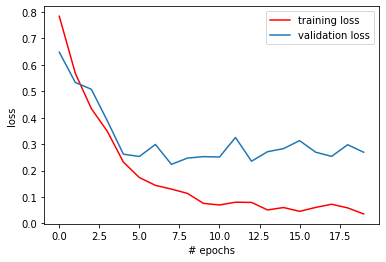

In [5]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

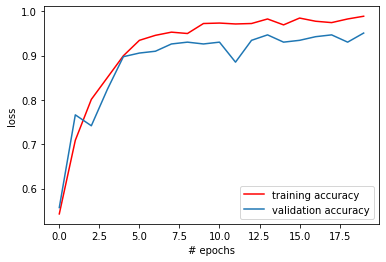

In [6]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [7]:
print(model.evaluate(test_data,test_target))

136/136 [==============================] - 2s 14ms/step
[0.2560035469393958, 0.9264705777168274]
